In [1]:
import cv2
import matplotlib.pyplot as plt
import copy
import numpy as np
import time

from src import model
from src import util
from src.body import Body


In [2]:
body_estimation = Body('model/body_pose_model.pth')

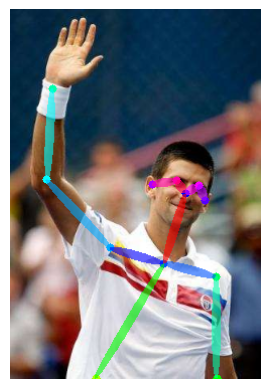

In [3]:
test_image = 'images/demo.jpg'
oriImg = cv2.imread(test_image)  # B,G,R order
scale =368/ oriImg.shape[0]
oriImg = cv2.resize(oriImg,None,fx=scale,fy=scale)
candidate, subset = body_estimation(oriImg)

canvas = copy.deepcopy(oriImg)
canvas = util.draw_bodypose(canvas, candidate, [subset])
plt.imshow(canvas[:, :, [2, 1, 0]])
plt.axis('off')
plt.show()

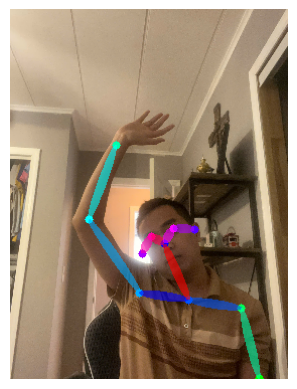

In [4]:
compare_image = 'images/compare3.jpg'
compare_image = cv2.imread(compare_image)  # B,G,R order
scale =368/ compare_image.shape[0]
compare_image = cv2.resize(compare_image,None,fx=scale,fy=scale)
#oriImg = cv2.flip(oriImg,1)
candidate_cp, subset_cp = body_estimation(compare_image)

canvas = copy.deepcopy(compare_image)
canvas = util.draw_bodypose(canvas, candidate_cp, [subset_cp])
plt.imshow(canvas[:, :, [2, 1, 0]])
plt.axis('off')
plt.show()

In [5]:
body_estimation.compare(oriImg,compare_image)

(array([  8.66826943,   5.29008121,  -8.40572694, -16.23117459,
         13.85350672,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
         40.64577894]),
 0.8276027077417955)

In [9]:
limbSeq = [[2, 3], [2, 6], [3, 4], [4, 5], [6, 7], [7, 8], [2, 9], [9, 10], \
            [10, 11], [2, 12], [12, 13], [13, 14], [2, 1]]

In [10]:
def getSubvector(kps,limbSeq):
    return np.array([[kps[limbSeq[i][0]-1][0] - kps[limbSeq[i][1]-1][0],kps[limbSeq[i][0]-1][1] - kps[limbSeq[i][1]-1][1],kps[limbSeq[i][0]-1][2] + kps[limbSeq[i][1]-1][2]] if kps[limbSeq[i][0]-1][2]!=0 and kps[limbSeq[i][1]-1][2]!=0 else [0,0,0] for i in range(len(limbSeq))])

In [11]:
vect1 = getSubvector(kps1,limbSeq)
vect2 = getSubvector(kps2,limbSeq)

In [12]:
def getAngleSetAndScore(vect1,vect2):
    numerator = vect1[:,0]*vect2[:,1]-vect1[:,1]*vect2[:,0]
    denominator = np.sum(vect2[:,:2]*vect1[:,:2],1)
    angle = np.arctan2(denominator, numerator)
    angle = np.degrees(angle)
    angle[angle!=0]-=90
    return angle,1-sum(np.abs(angle))/(sum(angle!=0)*90)

In [13]:
angle = getAngleSetAndScore(vect1,vect2)
angle

(array([  5.7927965 ,   5.39642876,  -3.57349058, -16.1838289 ,
         13.73772416,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
         44.40934279]),
 0.8350118302338262)